# Defining Problems

## eval_measure : WRMSE(Weighted Root Mean Squared Error)
$WRMSE = \sum\limits_{i=1}^{n}\sqrt{\dfrac{(y_i-\hat{y}_i)^2w_i}{\sum w_i}}$
- $y_i$ : i번째 실제 값(선수의 실제 OPS)
- $\hat{y}_i$ : i번째 예측값(선수의 예측된 OPS)
- $w_i$ : i번째 가중치(선수의 타수)
- $\sum w_i$ : 모든 가중치의 합(모든 선수들의 타수의 합)

-> 타수가 높을수록 더 큰 가중치를 가지기 때문에 주전 선수들의 성적을 예측하는 것이 더 중요할 것이다
 - 한 경기도 출전하지 못한 선수의 가중치는 0이 되므로 계산 결과도 0이 된다

In [2]:
pd.DataFrame({
    '용어' : ['OBP', 'SLG', 'OPS', 'AB', 'BB', 'HBP', 'SF', 'AVG', '1B,2B,3B', 'HR, H'],
    '설명' : ['출루율(On Base Percentage), 타수 대비 아웃되지 않고 1루로 출루한 비율',
             '장타율(Slugging Percentage), 타수에서 기대되는 평균 루타', 
             '출루율과 장타율의 합(On base Plus Slugging)', 
             '타수(At Bat), 타자가 정규로 타격을 완료한 횟수', 
             '볼넷(Base on Balls), 볼을 네 번 얻어 출루한 경우', 
             '사구, 투수가 던진 공이 타자에 맞아 출루한 경우', 
             '희생 플라이(Sacrifice Fly), 타자 본인은 아웃이지만 주자를 진루시켜준 경우', 
             '타율(Batting Average), 타수 대비 안타 비율',
             '1루타, 2루타, 3루타. 한 번의 안타로 몇 루까지 진출했는지 표시', 
             '홈런, 안타(1B+2B+3B+HR)']
})

NameError: name 'pd' is not defined

# EDA

In [3]:
from matplotlib import font_manager, rc
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import platform

# 맑은 고딕 이용
font_name = font_manager.FontProperties(fname = "c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family = font_name)

# 그래프에서 마이너스 기호가 표시되게하는 설정
matplotlib.rcParams['axes.unicode_minus'] = False

## 프리시즌 데이터 분석
한국 프로야구는 시즌 개막 전 약 2주동안 시범경기(프리시즌)을 치른다.

팀별로 5개 팀과 2차전까지 10경기를 치르며, 리그 전체에서 총 50경기를 진행한다.

In [4]:
# 프리시즌 데이터
preseason_df = pd.read_csv('datasets_kbo/Pre_Season_Batter.csv')
# 정규시즌 데이터
regular_season_df = pd.read_csv('datasets_kbo/Regular_Season_Batter.csv')
# 데이터 크기 확인
print(preseason_df.shape)
display(preseason_df.head())

(1393, 29)


,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
0,0,가르시아,2018,LG,0.350,7,20,1,7,1,...,1,0.550,0.409,1,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.959
1,1,강경학,2011,한화,0.000,4,2,2,0,0,...,0,0.000,0.500,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.500
2,1,강경학,2014,한화,-,4,0,2,0,0,...,0,NaN,NaN,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,NaN
3,1,강경학,2015,한화,0.130,10,23,3,3,0,...,0,0.130,0.286,2,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.416
4,1,강경학,2016,한화,0.188,14,32,4,6,1,...,0,0.281,0.212,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.493


In [5]:
# 데이터 기초통계량 확인
display(preseason_df.describe())

,batter_id,year,G,AB,R,H,2B,3B,HR,TB,...,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,OPS
count,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,...,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1364.000000,1368.000000,1393.000000,1364.000000
mean,173.434314,2013.014358,8.705671,19.201723,2.679828,5.021536,0.954774,0.119885,0.391960,7.391960,...,0.629576,0.291457,1.877961,0.330223,3.714286,0.447236,0.361012,0.317912,0.381910,0.676924
std,94.716851,4.166757,5.562686,13.395946,2.637212,4.232584,1.196904,0.379976,0.748557,6.538787,...,1.146854,0.595522,2.053392,0.642204,3.180884,0.723364,0.269892,0.151489,0.729521,0.386933
min,0.000000,2002.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.000000,2010.000000,6.000000,9.000000,1.000000,2.000000,0.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.217000,0.250000,0.000000,0.472000
50%,178.000000,2014.000000,9.000000,18.000000,2.000000,4.000000,1.000000,0.000000,0.000000,6.000000,...,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.344500,0.333000,0.000000,0.675000
75%,254.000000,2017.000000,11.000000,28.000000,4.000000,8.000000,2.000000,0.000000,1.000000,11.000000,...,1.000000,0.000000,3.000000,1.000000,5.000000,1.000000,0.478000,0.400000,1.000000,0.867000
max,344.000000,2018.000000,119.000000,183.000000,35.000000,51.000000,11.000000,4.000000,5.000000,68.000000,...,9.000000,4.000000,21.000000,4.000000,36.000000,5.000000,4.000000,1.000000,5.000000,5.000000


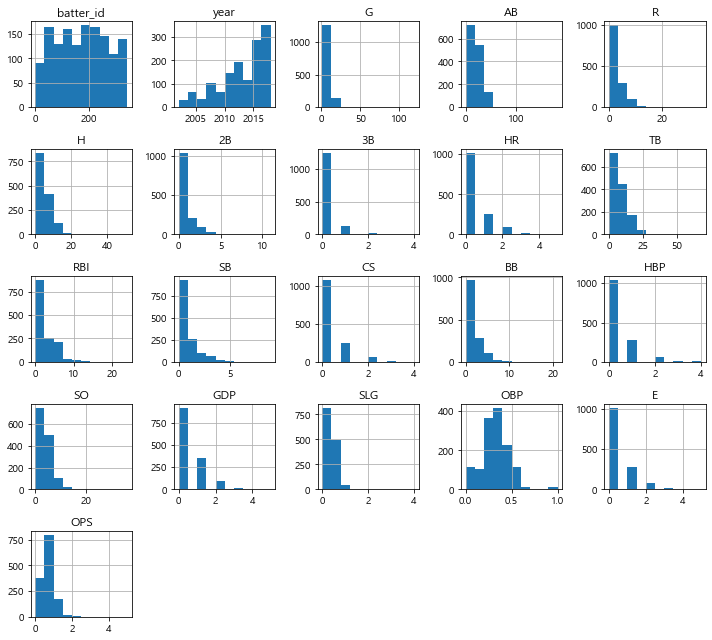

In [6]:
# 데이터 시각화
preseason_df.hist(figsize = (10, 9))
plt.tight_layout() # 그래프 간격 설정
plt.show()

1. 2B, 3B, AB, BB, CS, SLG, R, TB에서 대부분의 값이 0에 가까운 낮은 값을 기록했음을 확인할 수 있다

-> 프리시즌의 경기 수가 적어서 나타나는 현상이라고 볼 수 있다

2. 2B, 3B, HBP 등을 보면 값의 범위가 매우 작게 형성되어 있다


3. 연도의 분포를 보면 과거의 데이터일수록 기록이 적음을 확인할 수 있다

분포를 살펴본 결과 프리시즌 데이터는 양이 부족한 상황임을 알 수 있는데, 정규시즌 데이터와 비교해서 객관적으로 탐색

In [7]:
# 정규시즌 데이터에서 2002년 이후의 연도별 기록된 선수의 수 
regular_count = regular_season_df.groupby('year')['batter_id'].count().rename('regular')
preseason_count = preseason_df.groupby('year')['batter_id'].count().rename('preseason')
pd.concat([regular_count, preseason_count, np.round(preseason_count/regular_count,2).rename('ratio')], axis = 1).transpose().loc[:,2002:]

year,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
regular,43.00,54.00,68.00,73.00,85.00,98.00,115.00,124.00,130.00,151.0,174.0,194.00,186.00,207.00,213.00,217.00,227.0
preseason,12.00,19.00,28.00,37.00,36.00,43.00,61.00,66.00,72.00,75.0,87.0,104.00,117.00,134.00,153.00,167.00,182.0
ratio,0.28,0.35,0.41,0.51,0.42,0.44,0.53,0.53,0.55,0.5,0.5,0.54,0.63,0.65,0.72,0.77,0.8


과거로 갈수록 프리시즌의 기록이 정규시즌의 기록보다 적어지는 것을 확인할 수 있다

In [8]:
# 프리시즌의 성적과 정규시즌의 성적 간의 상관관계(비교를 위해 두 데이터에 공통으로 존재하는 선수들의 기록만 사용)
# 이를 위해 선수와 연도 데이터를 이용해 새로운 열을 생성하고 새로운 열의 교집합을 이용해 두 데이터셋에 모두 존재하는 선수만 불러오는 방식 적용
regular_season_df['new_idx'] = regular_season_df['batter_name'] + regular_season_df['year'].apply(str)
preseason_df['new_idx'] = preseason_df['batter_name'] + preseason_df['year'].apply(str)

# 새로운 인덱스의 교집합
intersection_idx = list(set(regular_season_df['new_idx']).intersection(preseason_df['new_idx']))
intersection_idx

# 교집합에 존재하는 데이터만 불러오기
regular_season_new = regular_season_df.loc[
    regular_season_df['new_idx'].apply(lambda x: x in intersection_idx)].copy()
regular_season_new = regular_season_new.sort_values(by = 'new_idx').reset_index(drop = True)

# 비교를 위해 인덱스로 정렬
preseason_new = preseason_df.loc[preseason_df['new_idx'].apply(lambda x: x in intersection_idx)].copy()
preseason_new = preseason_new.sort_values(by = 'new_idx').reset_index(drop = True)

# 검정 코드
print(regular_season_new.shape, preseason_new.shape)
sum(regular_season_new['new_idx'] == preseason_new['new_idx'])

(1358, 30) (1358, 30)


1358

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


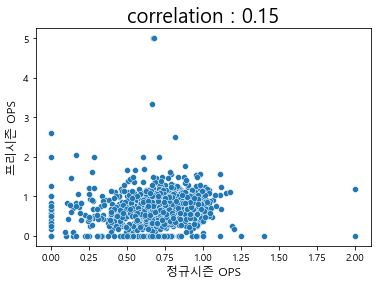

In [9]:
# 정규시즌과 프리시즌의 상관관계
correlation = regular_season_new['OPS'].corr(preseason_new['OPS'])
sns.scatterplot(regular_season_new['OPS'], preseason_new['OPS'])
plt.title('correlation : ' + str(np.round(correlation, 2)), fontsize = 20)
plt.xlabel('정규시즌 OPS', fontsize = 12)
plt.ylabel('프리시즌 OPS', fontsize = 12)
plt.show()

정규시즌과 프리시즌의 상관성이 아주 낮음을 확인할 수 있다.

EDA를 통해서 크게 2가지의 사실을 알아낼 수 있었음
1. 프리시즌 데이터의 경기 기록 수는 매우 적으므로 그 구성 역시 정규시즌 데이터와는 차이가 있을 수 있다
2. 프리시즌 데이터와 정규시즌 데이터와의 상관관계가 매우 낮다

--> 실제 분석에서는 프리시즌 데이터를 제외

## 정규시즌 데이터 분석

프리시즌 데이터와 같은 방식으로 진행

In [10]:
display(regular_season_df.shape, regular_season_df.head())
regular_season_df.describe()

(2454, 30)

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS,new_idx
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,...,0.519,0.383,9,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.902,가르시아2018
1,1,강경학,2011,한화,0.000,2,1,0,0,0,...,0.000,0.000,1,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.000,강경학2011
2,1,강경학,2014,한화,0.221,41,86,11,19,2,...,0.349,0.337,6,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.686,강경학2014
3,1,강경학,2015,한화,0.257,120,311,50,80,7,...,0.325,0.348,15,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.673,강경학2015
4,1,강경학,2016,한화,0.158,46,101,16,16,3,...,0.257,0.232,7,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.489,강경학2016


,batter_id,year,avg,G,AB,R,H,2B,3B,HR,...,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,OPS
count,2454.000000,2454.000000,2428.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,...,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2428.000000,2430.000000,2454.000000,2428.000000
mean,178.079462,2011.614507,0.237559,72.535045,201.514670,29.912388,55.988183,9.863488,0.957620,5.504075,...,5.290139,2.335778,20.943765,3.424613,38.596985,4.603504,0.343826,0.306684,3.676447,0.649939
std,97.557947,4.992833,0.098440,45.093871,169.537029,28.778759,52.253844,9.871314,1.647193,7.989380,...,9.088580,3.194045,21.206113,4.132614,31.801466,4.713531,0.163335,0.111778,4.585248,0.261634
min,0.000000,1993.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,101.250000,2008.000000,0.203000,28.000000,38.250000,5.000000,8.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,3.000000,0.000000,10.000000,1.000000,0.267454,0.272727,0.000000,0.546000
50%,183.000000,2013.000000,0.255000,79.000000,163.000000,21.000000,40.000000,7.000000,0.000000,2.000000,...,2.000000,1.000000,14.000000,2.000000,33.000000,3.000000,0.360124,0.328592,2.000000,0.688637
75%,265.000000,2016.000000,0.291000,115.000000,357.500000,49.000000,100.000000,16.000000,1.000000,8.000000,...,6.000000,3.000000,34.000000,5.000000,60.000000,7.000000,0.436000,0.367000,5.000000,0.797234
max,344.000000,2018.000000,1.000000,144.000000,600.000000,135.000000,201.000000,47.000000,17.000000,53.000000,...,84.000000,21.000000,108.000000,27.000000,161.000000,24.000000,3.000000,1.000000,30.000000,4.000000


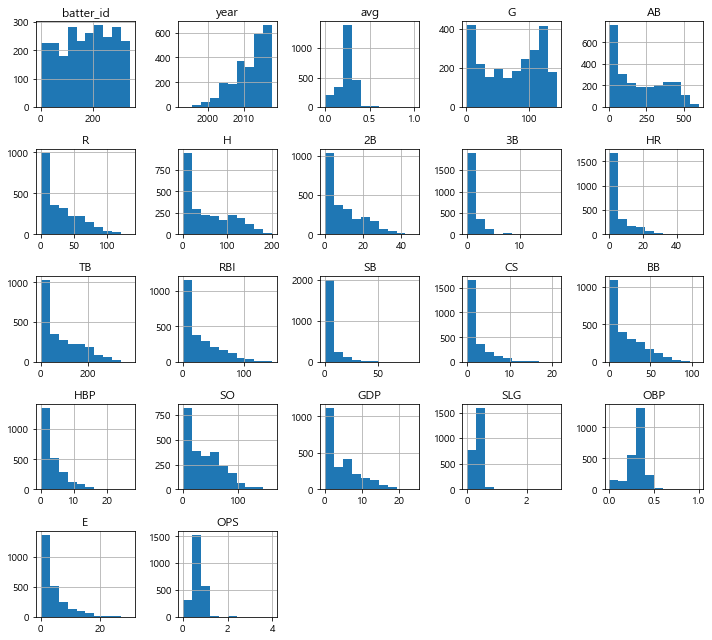

In [11]:
regular_season_df.hist(figsize = (10,9))
plt.tight_layout()
plt.show()

OPS를 보면 0~4 사이의 값을 갖고, 대부분의 값이 1 이하임을 확인할 수 있다

예측 대상이므로 boxplot을 통해서 더 자세하게 탐색

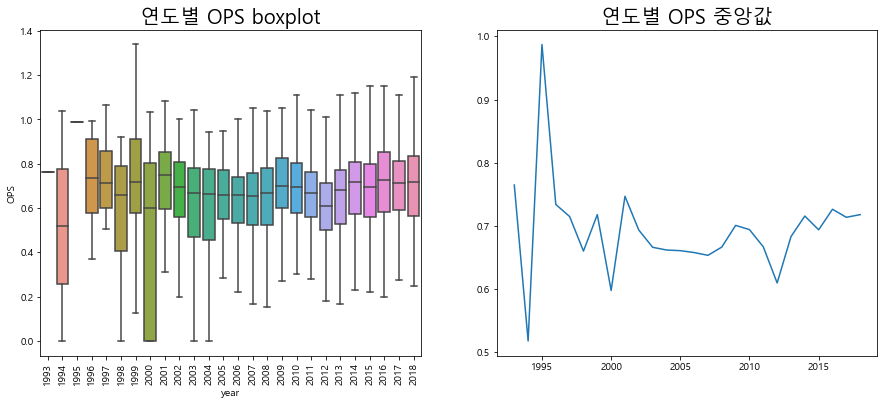

In [12]:
plt.figure(figsize = (15, 6))
plt.subplot(1,2,1)
g = sns.boxplot(x = 'year', y = 'OPS', data = regular_season_df, showfliers = False)
g.set_title('연도별 OPS boxplot', size = 20)
g.set_xticklabels(g.get_xticklabels(), rotation = 90)

plt.subplot(1,2,2)
plt.plot(regular_season_df.groupby('year')['OPS'].median())
plt.title('연도별 OPS 중앙값', size = 20)
plt.show()

2000년 이전에는 변동이 상당히 크고, 그 이후로는 상대적으로 변동폭이 크지 않은 추세를 보인다.

연도에 따른 데이터의 수에 차이가 있음을 확인했으므로 연도별 OPS를 좀 더 자세히 탐색

In [13]:
pd.crosstab(regular_season_df['year'], 'count').T

year,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
col_0,,,,,,,,,,,,,,,,,,,,,
count,1,2,1,7,8,10,14,20,32,43,...,124,130,151,174,194,186,207,213,217,227


2000년도 이전에는 기록의 수가 20개 이하로 매우 적었기 때문에 변동 폭이 컸을 것이라고 판단할 수 있음 

**팀별 및 연도별 OPS 값 탐색(선수들의 성적은 팀의 성적에도 영향을 받을 수 있기 때문)**

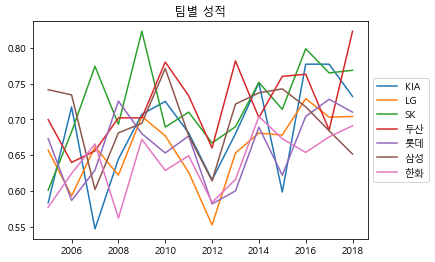

In [25]:
# 연도별 팀의 OPS 중앙값 계산
med_OPS_team = regular_season_df.pivot_table(index = ['team'], columns = 'year', values = 'OPS', aggfunc = 'median')

# 2005년 이후에 결측치가 존재하지 않는 팀만 확인
team_idx = med_OPS_team.loc[:,2005:].isna().sum(axis = 1) == 0 

plt.plot(med_OPS_team.loc[team_idx, 2005:].T)
plt.legend(med_OPS_team.loc[team_idx, 2005:].T.columns,
           loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.title('팀별 성적')
plt.show()

**키와 몸무게 변수를 이용해 성적과 연관성이 있는지 확인**

In [29]:
import re

regular_season_df['weight'] = regular_season_df['height/weight'].apply(
    lambda x: int(re.findall('\d+', x.split('/')[1])[0]) if pd.notnull(x) else x)

In [27]:
regular_season_df['height/weight']

0       177cm/93kg
1       180cm/72kg
2       180cm/72kg
3       180cm/72kg
4       180cm/72kg
           ...    
2449    181cm/82kg
2450    181cm/82kg
2451    181cm/82kg
2452    181cm/82kg
2453    181cm/82kg
Name: height/weight, Length: 2454, dtype: object

In [44]:
regular_season_df['weight'] = regular_season_df['height/weight'].apply(
    lambda x: int(re.findall('\d+', x.split('/')[1])[0]) if pd.notnull(x) else x) # 정규 표현식 : /로 분리된 문자열의 2번째 section에서 숫자를 추출한 후 그 중 1번째 값 
    
regular_season_df['height'] = regular_season_df['height/weight'].apply(
    lambda x: int(re.findall('\d+', x.split('/')[0])[0]) if pd.notnull(x) else x)
                  
print(regular_season_df['height/weight'][0], regular_season_df['height'][0], regular_season_df['weight'][0])

177cm/93kg 177.0 93.0


몸무게를 키로 나눠 새로운 변수 생성. 이 값이 크면 키에 비해 몸무게가 많이 나가며 힘이 셀 것이고, 작으면 키에 비해 몸무게가 적게 나가므로 스피드가 빠를 것이라고  추측할 수 있다